In [1]:
%matplotlib notebook

In [2]:
AREAS = range(50, 300, 50)  # 50, 100, 150, 200, 250

In [3]:
import random
import math

import ipywidgets as widgets


def prepare_inputs(areas):
    input_widgets = []
    prev_area = 0
    for area in areas:
        w = widgets.BoundedIntText(
            value=random.randint(1, 10) * area,
            min=0,
            max=2**10000,
            description=f'{prev_area}-{area} m^2:',
        )
        display(w)
        input_widgets.append(w)
        prev_area = area
    
    return input_widgets

        
def prepare_button():
    b = widgets.Button(
        description='Calculate',
        button_style='success',
        tooltip='Click to calculate prices',
    )
    display(b)
    
    return b



BoundedIntText(value=300, description='0-50 m^2:', max=1995063116880758384883742162683585083823496831886192454…

BoundedIntText(value=600, description='50-100 m^2:', max=19950631168807583848837421626835850838234968318861924…

BoundedIntText(value=900, description='100-150 m^2:', max=1995063116880758384883742162683585083823496831886192…

BoundedIntText(value=1800, description='150-200 m^2:', max=199506311688075838488374216268358508382349683188619…

BoundedIntText(value=750, description='200-250 m^2:', max=1995063116880758384883742162683585083823496831886192…

Button(button_style='success', description='Calculate', style=ButtonStyle(), tooltip='Click to calculate price…

<IPython.core.display.Javascript object>


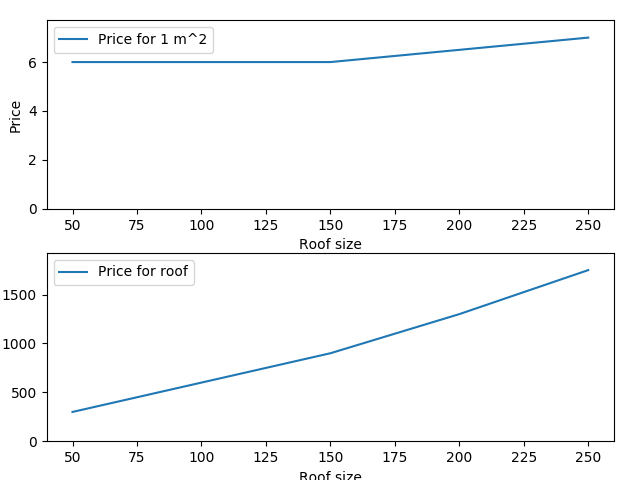

In [4]:
import matplotlib.pyplot as plt


areas = list(AREAS)
inputs = prepare_inputs(AREAS)
submit_b = prepare_button()


def prepare_plots():
    fig, axes = plt.subplots(2, 1, squeeze=False)

    ax1 = axes[0][0]
    ax2 = axes[1][0]

    fig.tight_layout()

    ax1.plot(areas, [i.value / areas[n] for n, i in enumerate(inputs)], label='Price for 1 m^2')
    ax2.plot(areas, [i.value for i in inputs], label='Price for roof')

    for ax in (ax1, ax2):
        ax.set_xlabel('Roof size')
        ax.set_ylabel('Price')

        ax.legend()
        
    return ax1, ax2


ax1, ax2 = prepare_plots()
        

def calc_and_redraw_graph(button):
    data1 = [i.value / areas[n] for n, i in enumerate(inputs)]
    ax1.lines[0].set_ydata(data1)
    ax1.set_ylim(0, max(data1) * 1.1)
    
    data2 = [i.value for i in inputs]
    ax2.lines[0].set_ydata(data2)
    ax2.set_ylim(0, max(data2) * 1.1)
    
    
submit_b.on_click(calc_and_redraw_graph)